# session 28

In [688]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re
import plotly.express as pt

why dO  EDA

1) Model builiding
2) analysing and reportin
3) feature engineering
4) handling missing values
5) detection outliers

In [689]:
df = pd.read_csv('train.csv')

In [690]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [692]:
df['Age'].sample(20)

347     NaN
728    25.0
466     NaN
688    18.0
201     NaN
878     NaN
326    61.0
415     NaN
167    45.0
888     NaN
838    32.0
175    18.0
716    38.0
260     NaN
446    13.0
61     38.0
501    21.0
6      54.0
877    19.0
453    49.0
Name: Age, dtype: float64

In [693]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# column Type
1) numerical  age,fare,etc
2) Categorical -> Survived , Pclass,sex,
3) Mixed ->Name,ticket

univariate analysis 

let try univarate analyis on age 

In [694]:

#! age
#? conclusion
# age is normally distrubuted 
# 20% of age value are siming
# there 


In [695]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

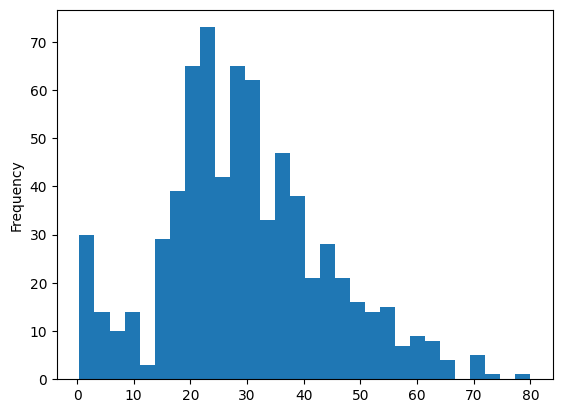

In [696]:
df['Age'].plot(kind='hist',bins=30)

<Axes: xlabel='Age', ylabel='Density'>

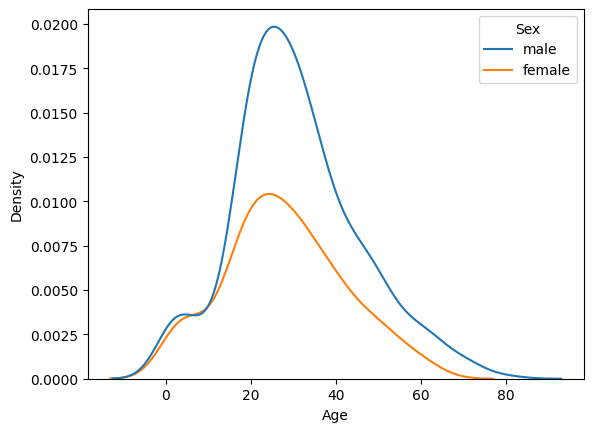

In [697]:
sns.kdeplot(data=df,x='Age',hue='Sex')

In [698]:
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

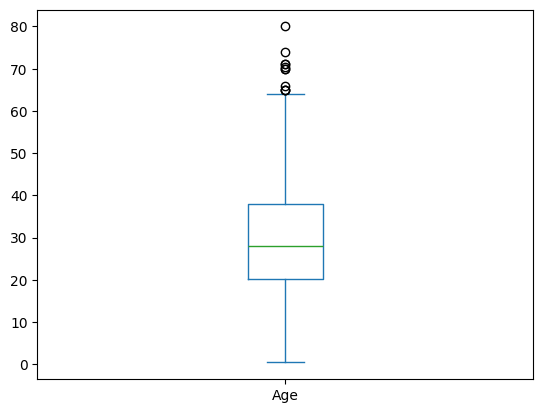

In [699]:
df['Age'].plot(kind='box')

In [700]:
df['Age'].isnull().sum()

np.int64(177)

TOtal missing values calculate by percentage

In [701]:
df['Age'].isnull().sum()/len(df['Age'])

np.float64(0.19865319865319866)

In [702]:
kf =df[df['Age']>65]

In [703]:
kf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [704]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Fare

In [705]:
# fare 
# conclusion

#the data is highly skewed
# fare contain the group fare and not the single one 
# we need to create new col indivisual fare

In [706]:
df['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [707]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

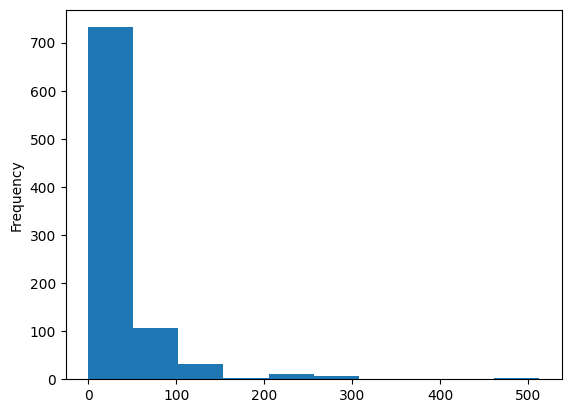

In [708]:
df['Fare'].plot(kind='hist')

<Axes: xlabel='Fare', ylabel='Density'>

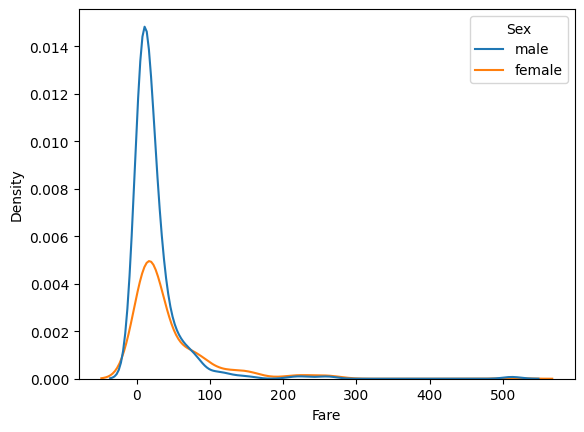

In [709]:
sns.kdeplot(data=df,x='Fare',hue='Sex')

In [710]:
df['Fare'].skew()

np.float64(4.787316519674893)

<Axes: >

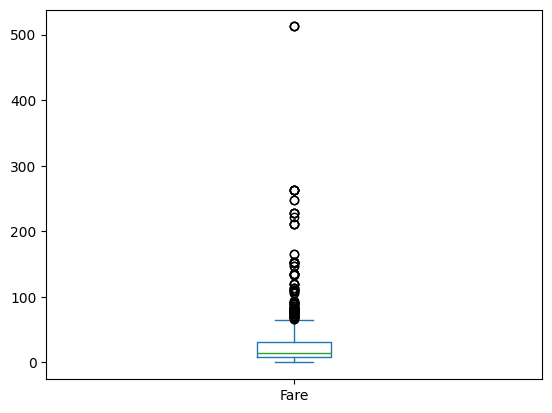

In [711]:
df['Fare'].plot(kind='box')

In [712]:
fare_200 =df[df['Fare']>200]

In [713]:
df[df['Fare']>250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [714]:
df['Fare'].isnull().sum()

np.int64(0)

In [715]:
fare_200

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


how to univarate analysis on categorical column

In [716]:
# survived

# parent and sibps are can be merged to new col family size
# create a new col called is alone

In [717]:
df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [718]:
# survived 
# conclusion
# there are 0 column are missing


<Axes: ylabel='Density'>

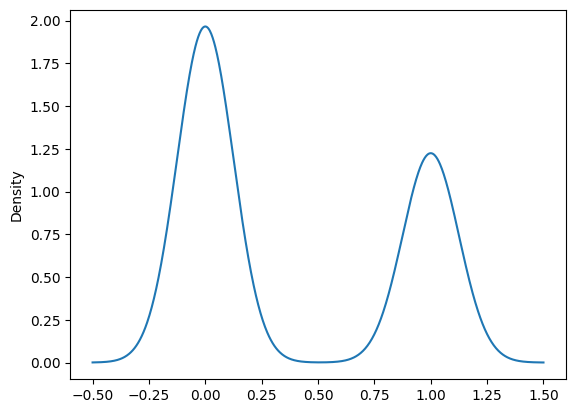

In [719]:
df['Survived'].plot(kind='kde')

<Axes: xlabel='Survived'>

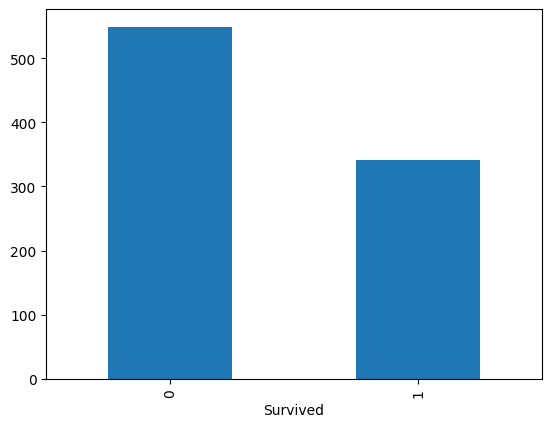

In [720]:
df['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

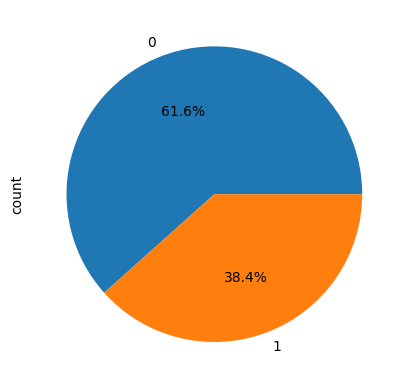

In [721]:
df['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [722]:
df['Survived'].isnull().sum()

np.int64(0)

In [723]:
df['Survived'].skew()

np.float64(0.4785234382949897)

pclass

In [724]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

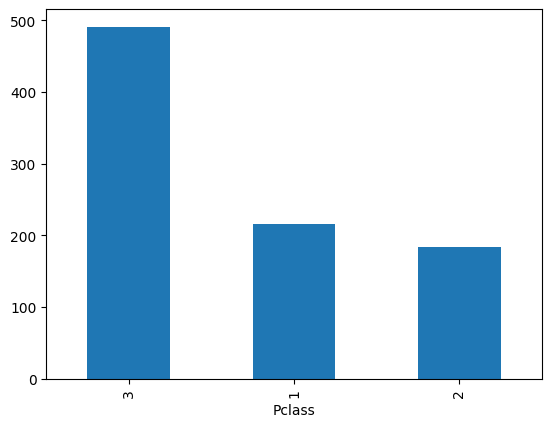

In [725]:
df['Pclass'].value_counts().plot(kind='bar')

In [726]:
df[['Pclass','Fare','Age','Sex']].sample(12)

,Pclass,Fare,Age,Sex
680,3,8.1375,NaN,female
245,1,90.0000,44.0,male
467,1,26.5500,56.0,male
373,1,135.6333,22.0,male
658,2,13.0000,23.0,male
393,1,113.2750,23.0,female
857,1,26.5500,51.0,male
166,1,55.0000,NaN,female
717,2,10.5000,27.0,female
641,1,69.3000,24.0,female


<Axes: ylabel='count'>

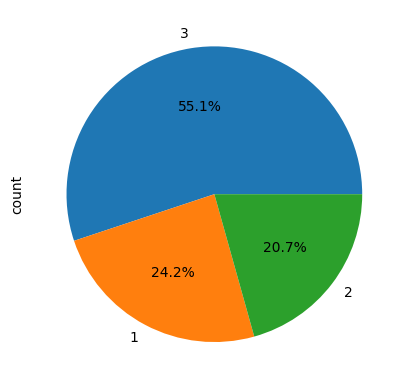

In [727]:
df['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [728]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

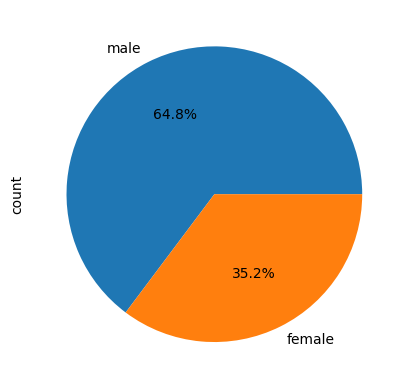

In [729]:
df['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [730]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

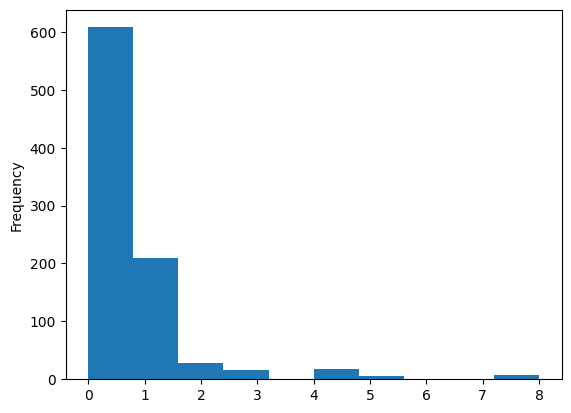

In [731]:
df['SibSp'].plot(kind='hist')

<Axes: ylabel='count'>

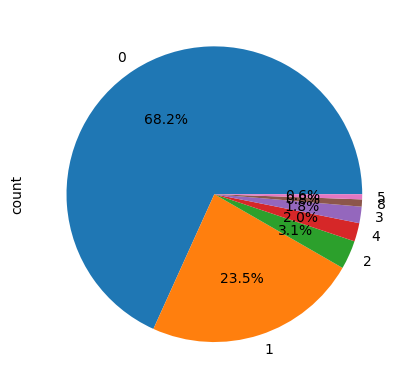

In [732]:
df['SibSp'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [733]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

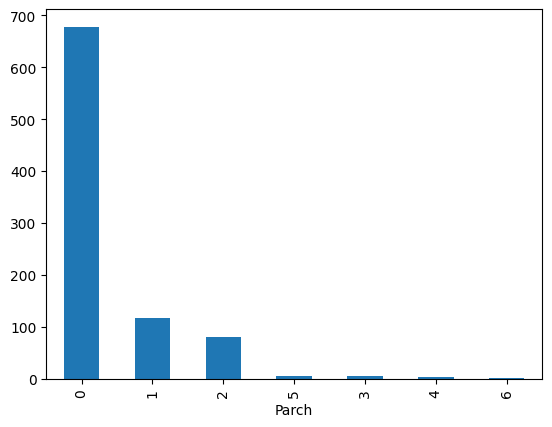

In [734]:
df['Parch'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

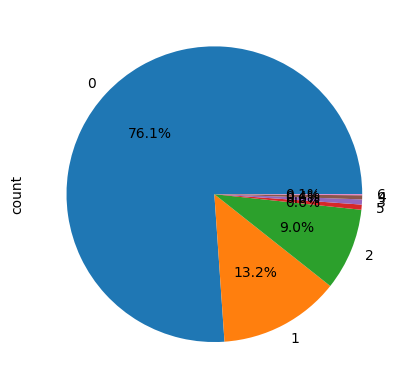

In [735]:
df['Parch'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [736]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

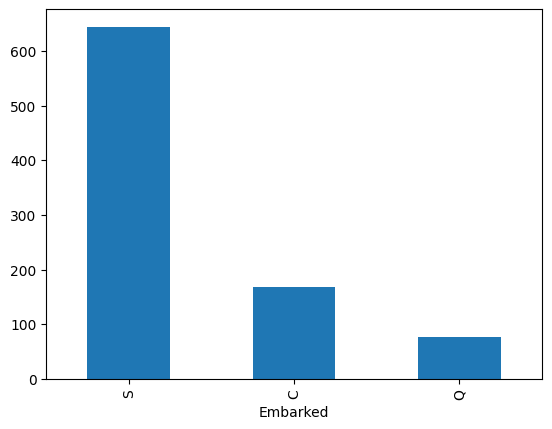

In [737]:
df['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

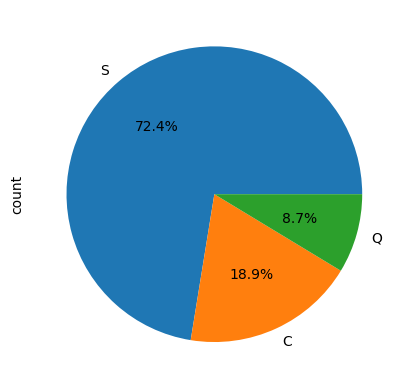

In [738]:
df['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [739]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# bivariate analysis

In [740]:
#~  select 2 column
#! numerical and numerical -plot scatter and line plot
#* numerical and catogorical --bar plot,boxplot,kdeplot ,violenplot,even scatterplot
#^ categorical and categorical --plot heat,stacked,barplot,treemap


crosstab wise survived and pclass 

In [741]:
pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

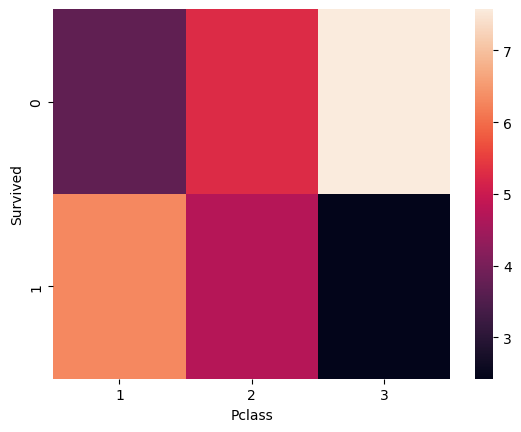

In [742]:
sns.heatmap(pd.crosstab(df['Survived'],df['Pclass'],normalize='columns')*10)

In [743]:
pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

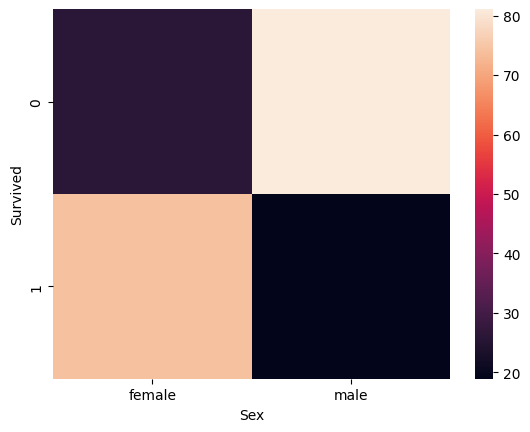

In [744]:
sns.heatmap(pd.crosstab(df['Survived'],df['Sex'],normalize='columns')*100)

In [745]:
pd.crosstab(df['Sex'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [746]:
pd.crosstab(df['Pclass'],df['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


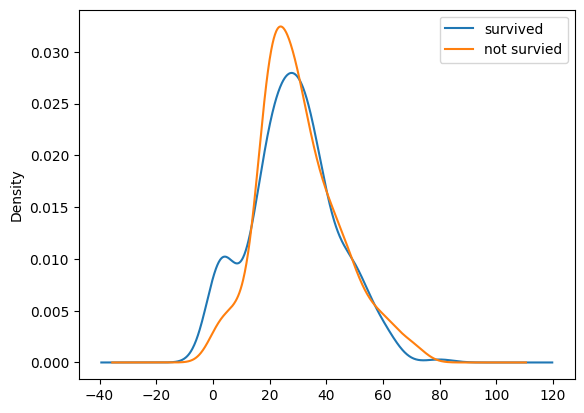

In [747]:
# survived and age
import matplotlib.pyplot as plt

df[df['Survived']==1]['Age'].plot(kind='kde',label='survived')

df[df['Survived']==0]['Age'].plot(kind='kde',label='not survied')
plt.legend()
plt.show()

feature engineering on fare col

In [748]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [749]:
df1  = pd.read_csv('test.csv')


In [750]:
#! 
#! here sips total is 8 and parent=2 means the total include  
#* the passenger is 11 so but the data is incomplete
#^ other entry are in test dataset we need to merge or contact
#?

In [751]:
df[df['SibSp']==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [752]:
df[df['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [753]:
merge =pd.concat([df,df1])

In [754]:
merge[merge['Ticket']=='CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
188,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [755]:
merge['Ticket'].value_counts()

Ticket
CA. 2343        11
1601             8
CA 2144          8
347082           7
S.O.C. 14879     7
                ..
A.5. 3236        1
347086           1
365237           1
334915           1
28666            1
Name: count, Length: 929, dtype: int64

In [756]:
merge[merge['Ticket']=='CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


creating new column using dividing sibsp + parch +1

In [757]:
merge['indivisal_fares']= (merge['Fare']/(merge['SibSp']+merge['Parch']+1)).round()

In [758]:
# merge.drop(columns='indivisal_fare',inplace=True)

In [759]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisal_fares
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,36.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,27.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,109.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.0
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.0


In [760]:
merge[['indivisal_fares','Fare']].describe()

,indivisal_fares,Fare
count,1308.000000,1308.000000
mean,20.550459,33.295479
std,35.772272,51.758668
min,0.000000,0.000000
25%,7.000000,7.895800
50%,8.500000,14.454200
75%,24.000000,31.275000
max,512.000000,512.329200


<Axes: >

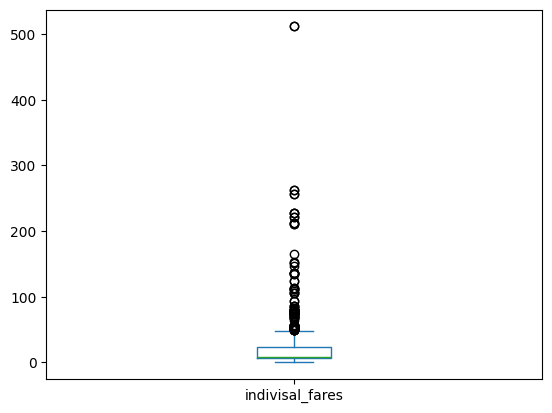

In [761]:
merge['indivisal_fares'].plot(kind='box')

creating family size and type of family small large 

In [762]:
merge['family_size']=merge['SibSp']+merge['Parch']+1

In [763]:

# ^ family type
def family(n):
    if n == 1:
        return "alone"
    elif n > 1 and n <= 2: 
        return "small"
    elif n > 2 and n <= 5:   # fixed (covers 3, 4, 5)
        return "medium"
    else:
        return "large"
family(3)

'medium'

In [764]:
merge['family_type']=merge['family_size'].apply(family)


In [765]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisal_fares,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,36.0,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8.0,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,27.0,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0,1,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.0,1,alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,109.0,1,alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.0,1,alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.0,1,alone


In [766]:
pd.crosstab(merge['Survived'],merge['family_size'],normalize='columns')*100

family_size,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0.0,69.646182,44.720497,42.156863,27.586207,80.0,86.363636,66.666667,100.0,100.0
1.0,30.353818,55.279503,57.843137,72.413793,20.0,13.636364,33.333333,0.0,0.0


In [767]:
pd.crosstab(merge['Survived'],merge['family_type'],normalize='columns')*100

family_type,alone,large,medium,small
Survived,,,,
0.0,69.646182,85.106383,43.150685,44.720497
1.0,30.353818,14.893617,56.849315,55.279503


In [768]:

#* name and other split to get info

In [769]:
merge['surname']=merge['Name'].str.split(',').str.get(0)

In [770]:
merge['Title']=merge['name']=merge['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [771]:
# merge.drop(columns='name',inplace=True)

In [772]:
merge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisal_fares,family_size,family_type,surname,Title,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,2,small,Braund,Mr.,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,36.0,2,small,Cumings,Mrs.,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,8.0,1,alone,Heikkinen,Miss.,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,27.0,2,small,Futrelle,Mrs.,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0,1,alone,Allen,Mr.,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.0,1,alone,Spector,Mr.,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,109.0,1,alone,Oliva y Ocana,Dona.,Dona.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.0,1,alone,Saether,Mr.,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.0,1,alone,Ware,Mr.,Mr.


In [773]:
merge['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Mme.           1
Don.           1
Sir.           1
Lady.          1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [774]:
merge['Title'] = merge['Title'].replace(['Rev.','Ms.','Lady.','Capt.','Major.','the.','Dr.','Don.','Sir.','Dona.'], 
                                        'other')


In [775]:
merge['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
other         25
Col.           4
Mlle.          2
Mme.           1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [776]:
temp_df =merge[merge['Title'].isin(['Mr.','Miss.','Mrs.','Master.','other'])]

In [777]:
temp_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,indivisal_fares,family_size,family_type,surname,Title,name
401,402,0.0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S,8.0,1,alone,Adams,Mr.,Mr.
222,223,0.0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.0500,NaN,S,8.0,1,alone,Green,Mr.,Mr.
709,710,1.0,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,5.0,3,medium,Moubarek,Master.,Master.
255,256,1.0,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",female,29.0,0,2,2650,15.2458,NaN,C,5.0,3,medium,Touma,Mrs.,Mrs.
180,1072,NaN,2,"McCrie, Mr. James Matthew",male,30.0,0,0,233478,13.0000,NaN,S,13.0,1,alone,McCrie,Mr.,Mr.


In [778]:
pd.crosstab(temp_df['Survived'],temp_df['Title'],normalize='columns')*100

Title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,65.0
1.0,57.5,69.78022,15.667311,79.2,35.0


missing percentage for cabin

In [779]:
merge['Cabin'].isnull().sum()/len(merge['Cabin'])*100

np.float64(77.46371275783041)

In [780]:

#^ cabin related deck and other thing to do
merge['Cabin'].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
C39                1
B24                1
D40                1
D38                1
C105               1
Name: count, Length: 186, dtype: int64

In [781]:
merge['Cabin'].fillna('M',inplace=True)

C:\Users\karli\AppData\Local\Temp\ipykernel_19264\455222394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merge['Cabin'].fillna('M',inplace=True)


In [782]:
merge['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
C39                   1
B24                   1
D40                   1
D38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [783]:

#* for getting deck related  using str[0]

merge['deck']=merge['Cabin'].str[0] 

In [784]:
pd.crosstab(merge['Pclass'],merge['deck'])

deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,22,65,94,40,34,0,0,67,1
2,0,0,0,6,4,13,0,254,0
3,0,0,0,0,3,8,5,693,0


In [785]:
pd.crosstab(merge['Survived'],merge['deck'],normalize='columns')*100

deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


<Axes: xlabel='Survived'>

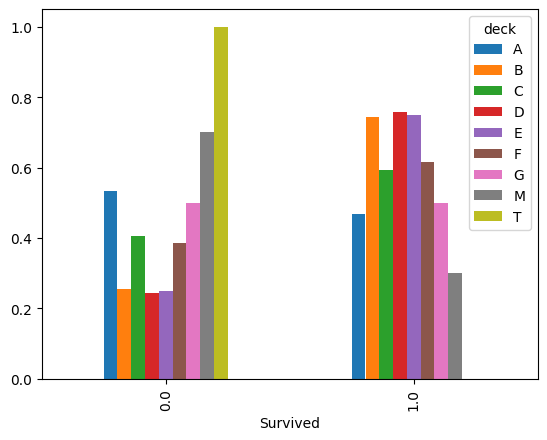

In [786]:
pd.crosstab(merge['Survived'],merge['deck'],normalize='columns').plot(kind='bar')

<Axes: xlabel='deck'>

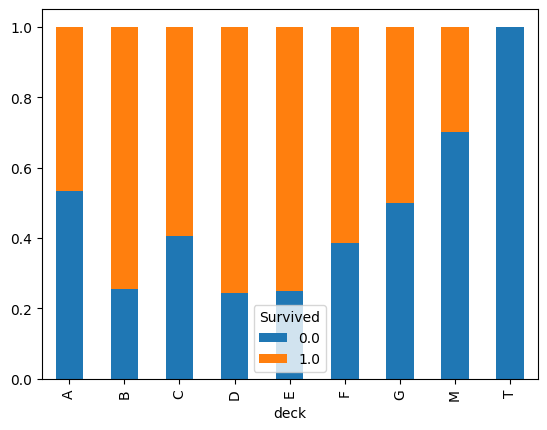

In [787]:
pd.crosstab(merge['deck'],merge['Survived'],normalize='index').plot(kind='bar',stacked=True)